# Exercise

We will work with some files from the publicly available dataset 'Instacart Market Basket Analysis': https://www.kaggle.com/c/instacart-market-basket-analysis/data

You must import the datasets **order_products_train.csv**, and **products.csv**; they are located in the folder *data/instacart*. Then, perform the following tasks:
- Verify if the datasets have missing values in any of its columns.
- Plot a chart with the 15 most purchased products *(you must show the name of the products instead of the id)*.
- Plot a chart with the 15 most purchased products that have been reordered *(you must show the name of the products instead of the id)*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
order_products_train_df = pd.read_csv("data/instacart/order_products_train.csv", index_col=0)
products_df = pd.read_csv("data/instacart/products.csv", index_col=0)

In [3]:
order_products_train_df

,product_id,add_to_cart_order,reordered
order_id,,,
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0
1,43633,5,1
...,...,...,...
3421063,14233,3,1
3421063,35548,4,1
3421070,35951,1,1


In [4]:
products_df

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13
...,...,...,...
49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49685,En Croute Roast Hazelnut Cranberry,42,1
49686,Artisan Baguette,112,3


In [5]:
order_products_train_df.isna().sum()

product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [6]:
products_df.isna().sum()

product_name     0
aisle_id         0
department_id    0
dtype: int64

In [7]:
def plot_bars(x_axis_data, y_axis_data, x_axis_label, y_axis_label, title, color, 
              orientation='vertical', figsize=(13,6)):
    plt.figure(figsize = figsize)
    if orientation == 'horizontal':
        plt.barh(x_axis_data, y_axis_data, color = color)
        plt.xlabel(y_axis_label, fontsize=12)
        plt.ylabel(x_axis_label, fontsize=12)
    elif orientation == 'vertical':
        plt.bar(x_axis_data, y_axis_data, color = color)
        plt.xlabel(x_axis_label)
        plt.ylabel(y_axis_label)
    plt.title(title, fontsize=14)
    plt.show()

In [8]:
# This function takes an id_list and returns the names associated according to the table passed
def get_products_by_id(id_list):
    outcomes = []
    outcomes = list(products_df.product_name.values[np.array(id_list) - 1])
    return outcomes

In [9]:
products_to_show = 15

In [10]:
products = dict(order_products_train_df.product_id.value_counts()[:products_to_show])
x1 = get_products_by_id(list(products.keys()))
y1 = list(products.values())

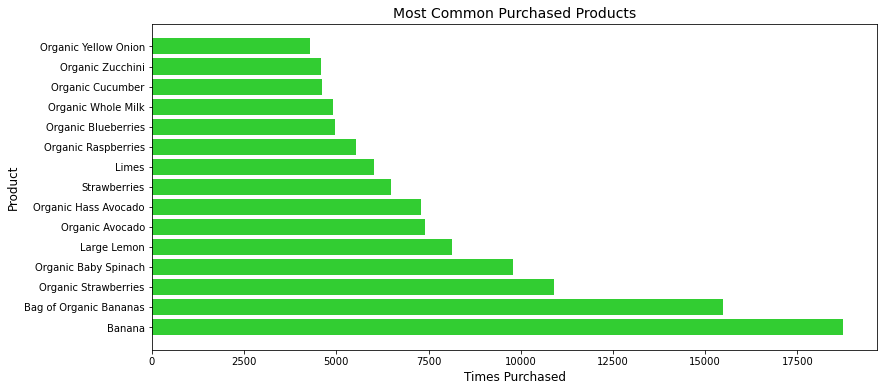

In [11]:
plot_bars(x1, y1, "Product", "Times Purchased", "Most Common Purchased Products", 'limegreen', 'horizontal')

In [12]:
reordered_products_df = order_products_train_df[order_products_train_df.reordered == 1]
products_reordered = dict(reordered_products_df.product_id.value_counts()[:products_to_show])
x2 = get_products_by_id(list(products_reordered.keys()))
y2 = list(products_reordered.values())

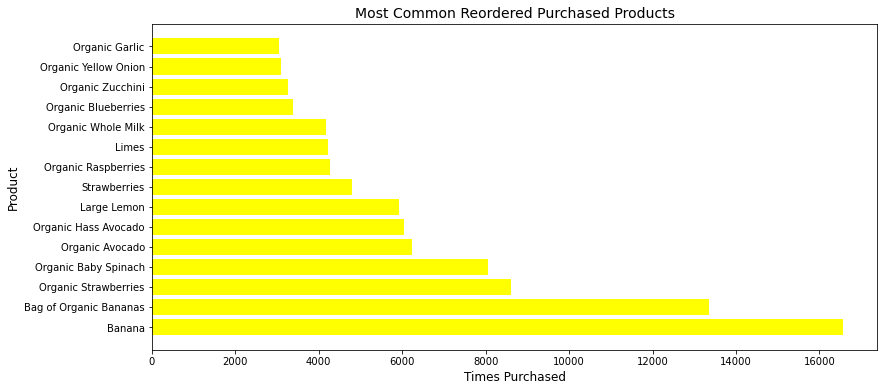

In [13]:
plot_bars(x2, y2, "Product", "Times Purchased", "Most Common Reordered Purchased Products", 'yellow', 'horizontal')

---

### Alternative solution using merge

In [14]:
merge_df = pd.merge(order_products_train_df, products_df, on=["product_id"])
merge_df

,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,49302,1,1,Bulgarian Yogurt,120,16
1,49302,7,1,Bulgarian Yogurt,120,16
2,49302,1,1,Bulgarian Yogurt,120,16
3,49302,11,1,Bulgarian Yogurt,120,16
4,49302,8,0,Bulgarian Yogurt,120,16
...,...,...,...,...,...,...
1384612,1528,12,0,Sprinkles Decors,97,13
1384613,47935,20,0,Classic Original Lip Balm SPF 12,73,11
1384614,9491,21,0,Goats Milk & Chai Soap,25,11
1384615,16380,12,0,Stevia Sweetener,97,13


In [15]:
merge_df.product_name.value_counts()[:products_to_show]

Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Organic Blueberries        4966
Organic Whole Milk         4908
Organic Cucumber           4613
Organic Zucchini           4589
Organic Yellow Onion       4290
Name: product_name, dtype: int64

In [18]:
products = dict(merge_df.product_name.value_counts()[:products_to_show])
x3 = list(products.keys())
y3 = list(products.values())

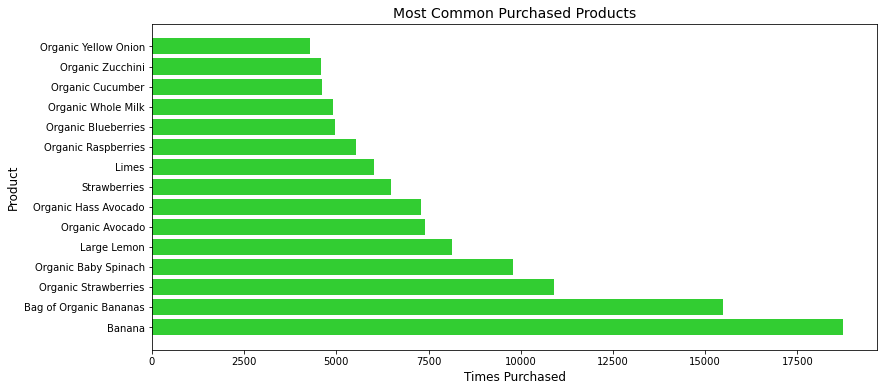

In [19]:
plot_bars(x3, y3, "Product", "Times Purchased", "Most Common Purchased Products", 'limegreen', 'horizontal')

In [20]:
products = dict(merge_df[merge_df.reordered == 1].product_name.value_counts()[:products_to_show])
x4 = list(products.keys())
y4 = list(products.values())

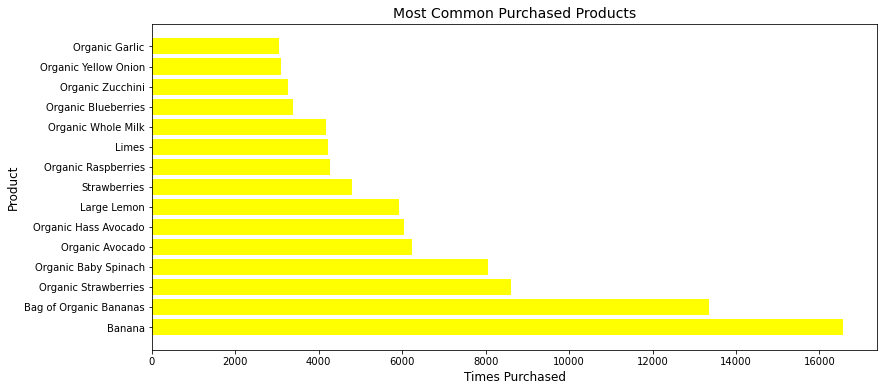

In [22]:
plot_bars(x4, y4, "Product", "Times Purchased", "Most Common Purchased Products", 'yellow', 'horizontal')